In [2]:
import torch

### Scalars

In [3]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

In [4]:
x + y, x - y, x * y, x / y, x**y

(tensor(5.), tensor(1.), tensor(6.), tensor(1.5000), tensor(9.))

### Vectors

In [5]:
x = torch.arange(3)
x

tensor([0, 1, 2])

By default, we visualize vectors by stacking their elements vertically.

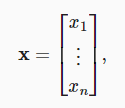

We can also distinguish between such column vectors and row vectors whose elements are stacked horizontally.

In [6]:
x[2]

tensor(2)

In [7]:
len(x)

3

In [8]:
x.shape

torch.Size([3])

The shape is a tuple that indicates a tensor’s length along each axis. Tensors with just one axis have shapes with just one element.

### Matrices

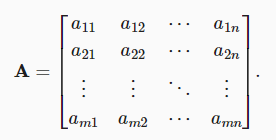

Visually, we can illustrate any matrix as a table. To refer to an individual element, we subscript both the row and column indices, e.g., **a<sub>ij</sub>** is the value that belongs to **A**’s **i<sup>th</sup>** row and **j<sup>th</sup>** column:

In [9]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

Sometimes we want to flip the axes. When we exchange a matrix’s rows and columns, the result is called its transpose. 

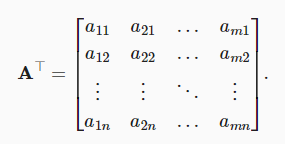


In [10]:
# You can access matrix's transpose:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [13]:
# Symmetric matrices are the subset of square matrices that are equal to their own transposes:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
print(A)
A == A.T

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])


tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

Matrices are useful for representing datasets. Typically, **rows correspond to individual records and columns correspond to distinct attributes.**